In [5]:
import Farkle

import importlib
importlib.reload(Farkle)

import numpy as np

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import matplotlib.pyplot as plt

In [6]:
three_die_farkle = Farkle.game(3)
three_die_farkle.set_policy(Farkle.find_next_action_manual_best)

In [7]:
histogram = three_die_farkle.evaluate_policy()

Rewards:  [  0 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900]
Probability of Farkle:  0.5006001371742113
Expected reward:  92.72940957933241


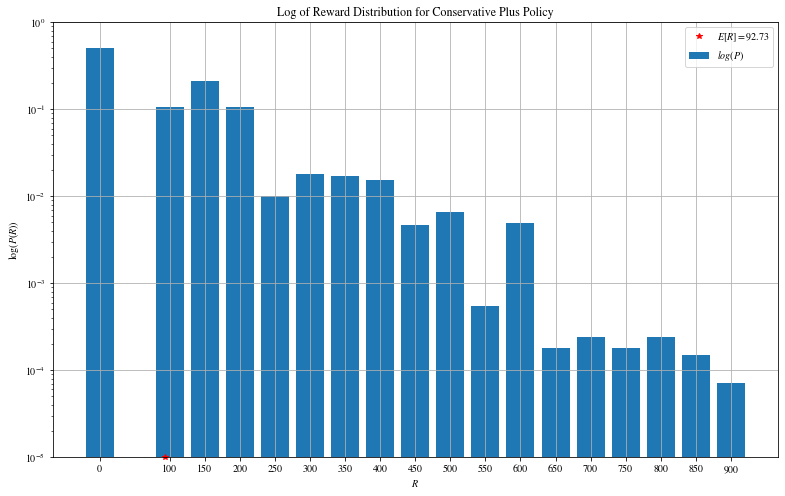

In [8]:

rewards = np.sort([key for key in histogram.keys()])
print("Rewards: ", rewards)
print("Probability of Farkle: ", histogram[0])
E = 0
for reward in histogram:
    E += reward * histogram[reward]
print("Expected reward: ", E)

text = "Log of Reward Distribution for ""Conservative Plus"" Policy"
plt.figure(text, figsize=(13, 8))
plt.bar(histogram.keys(), histogram.values(), width = 40, label = "$log(P)$")
plt.yscale("log")
plt.title(text)
plt.xlabel("$R$")
plt.xticks(rewards)
plt.ylim((1e-5, 1))
plt.ylabel("$\log(P(R))$")
plt.grid("on")
plt.plot(E, plt.ylim()[0], "r*", clip_on = False, label = "$E[R] = %2.2f$" % E)
plt.legend()
plt.savefig(text + (".%s" % "pdf"), bbox_inches='tight')
plt.show()